## Problem Definition

Most smartphones feature keyboards with next-word prediction capabilities; Google also utilizes next-word prediction based on our browsing history. As such, our smartphones store preloaded data to accurately predict the next word.In this project am going to develop a  Deep Learning model for next word prediction. I will use the Tensorflow and Keras library in Python for next word prediction model.For making a Next Word Prediction model, I will train a Recurrent Neural Network (RNN).

## Importing the necessary libraries
To start with our next word prediction model project, let’s import some all the libraries we need for this task:



In [9]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

## Data Preparation
As we had seen earlier, Google uses our browsing history to make next word predictions, smartphones, and all the keyboards that are trained to predict the next word are trained using some data. So I will also use a dataset. You can download the dataset from here:https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view?usp=sharing

So let us load the data we have downloaded and have a look what we are going to deal with.

In [10]:
path = '/content/drive/MyDrive/filename/1661-0.txt'
text = open(path).read().lower()
print('corpus length:', len(text))

corpus length: 581888


In [11]:
print(text)

﻿
project gutenberg's the adventures of sherlock holmes, by arthur conan doyle

this ebook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  you may copy it, give it away or
re-use it under the terms of the project gutenberg license included
with this ebook or online at www.gutenberg.net


title: the adventures of sherlock holmes

author: arthur conan doyle

release date: november 29, 2002 [ebook #1661]
last updated: may 20, 2019

language: english

character set encoding: utf-8

*** start of this project gutenberg ebook the adventures of sherlock holmes ***



produced by an anonymous project gutenberg volunteer and jose menendez



cover



the adventures of sherlock holmes



by arthur conan doyle



contents


   i.     a scandal in bohemia
   ii.    the red-headed league
   iii.   a case of identity
   iv.    the boscombe valley mystery
   v.     the five orange pips
   vi.    the man with the twisted lip
   vii.   the adventure of the blue 

Now I will split the dataset into each word in order but without the presence of some special characters.

In [12]:

tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)


Now the next process will be performing the feature engineering in our data. For this purpose, we will require a dictionary with each word in the data within the list of unique words as the key, and it’s significant portions as value.

In [13]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

## Feature Engineering
Feature Engineering means taking whatever information we have about our problem and turning it into numbers that we can use to build our feature matrix.Here I will define a Word length which will represent the number of previous words that will determine our next word. I will define prev words to keep five previous words and their corresponding next words in the list of next words

In [14]:
WORD_LENGTH = 5

prev_words = []

next_words = []

for i in range(len(words) - WORD_LENGTH):

    prev_words.append(words[i:i + WORD_LENGTH])

    next_words.append(words[i + WORD_LENGTH])

print(prev_words[0])

print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


Now I will create two numpy arrays x for storing the features and y for storing its corresponding label. I will iterate x and y if the word is available so that the corresponding position becomes 1.

In [15]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

Now before moving forward, have a look at a single sequence of words:

In [16]:
print(X[0][0])

[False False False ... False False False]


## Building the Recurrent Neural network
As I stated earlier, I will use the Recurrent Neural networks for next word prediction model for this project. Here I will use the LSTM model, which is a very powerful RNN

In [17]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

## Training the Next Word Prediction Model
I will be training the next word prediction model with 20 epochs

In [18]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=2, shuffle=True).history

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/2
811/811 [==============================] - 276s 333ms/step - loss: 6.0096 - accuracy: 0.1076 - val_loss: 7.0577 - val_accuracy: 0.1027
Epoch 2/2
811/811 [==============================] - 254s 313ms/step - loss: 5.7857 - accuracy: 0.1470 - val_loss: 8.0128 - val_accuracy: 0.1097


Now we have successfully trained our model, before moving forward to evaluating our model, it will be better to save this model for our future use.

In [19]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

## Evaluating the Next Word Prediction Model
Now let’s have a quick look at how our model is going to behave based on its accuracy and loss changes while training.

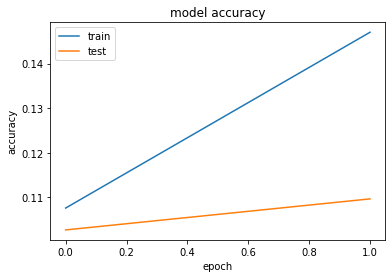

In [20]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

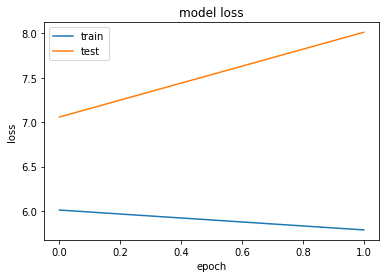

In [21]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## Testing Next Word Prediction Model
Now let’s build a python program to predict the next word using our trained model. For this, I will define some essential functions that will be used in the process.

In [22]:
def prepare_input(text):
    x = np.zeros((1, SEQUENCE_LENGTH, len(chars)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

Now before moving forward, let’s test the function, making sure we use a lower() function while giving input 

In [24]:
prepare_input=("This is an example of input for our LSTM".lower())

Note that the sequences should be 40 characters (not words) long so that we could easily fit it in a tensor of the shape (1, 40, 57). Not before moving forward, let’s check if the created function is working correctly.

In [25]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

Now I will create a function to return samples:

In [26]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

And now I will create a function for next word prediction:

In [27]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

This function is created to predict the next word until space is generated. It will do this by iterating the input, which will ask our RNN model and extract instances from it. Now I will modify the above function to predict multiple characters:

In [28]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

Now I will use the sequence of 40 characters that we can use as a base for our predictions.

In [29]:
quotes = [
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "That which does not kill us makes us stronger.",
    "I'm not upset that you lied to me, I'm upset that from now on I can't believe you.",
    "And those who were seen dancing were thought to be insane by those who could not hear the music.",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
]

Now finally, we can use the model to predict the next word: